### Import data

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tck

import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

### Reading data

In [10]:
df = pd.read_csv("C://Users/susmi/Documents/ML/Project 2/Data/species.csv",sep=",",index_col=0)

In [11]:
df.head(10)

,site,model,Year,Month,Latitude,Longitude,Depth,Region,Coral_cover,Reef_complexity,...,Pop_per_area_reef_20km,Random,impact,YEAR,HABITAT_CD,REGION,PCT_CORAL,MAX_HARD_RELIEF,no.divers,Diversity_index
0,4733520_128U,biomass,2005,August,24.446433,-81.962900,9.800000,FLA KEYS,2.000000,0.550322,...,0.047128,3786,0.205,2005,ISOL_LR,FLA KEYS,2.000000,0.550322,4,0.877755
1,4966028_487U,impact,2005,June,24.461130,-81.840099,8.821212,FLA KEYS,6.181818,1.886364,...,0.403795,503,0.382,2005,SPGR_HR,FLA KEYS,6.181818,1.886364,4,0.912085
2,4981032_102U,biomass,2005,July,24.467250,-81.832367,17.399239,FLA KEYS,7.506345,0.749873,...,0.392888,3430,NaN,2005,CONT_LR,FLA KEYS,7.506345,0.749873,4,0.882112
3,4999782_141U,impact,2005,August,24.468767,-81.822167,9.200000,FLA KEYS,10.000000,0.400000,...,0.386919,3696,NaN,2005,ISOL_LR,FLA KEYS,10.000000,0.400000,4,0.806049
4,5026033_475U,impact,2005,June,24.470206,-81.808148,8.558032,FLA KEYS,2.870486,0.289415,...,0.383887,4090,NaN,2005,ISOL_LR,FLA KEYS,2.870486,0.289415,4,0.829156
5,5067281_105U,biomass,2005,July,24.466283,-81.786533,26.504821,FLA KEYS,17.620519,1.200000,...,0.408742,7886,0.382,2005,SPGR_LR,FLA KEYS,17.620519,1.200000,4,0.826781
6,5157285_104U,impact,2005,July,24.474067,-81.739067,8.696966,FLA KEYS,25.018963,1.149431,...,0.389774,3052,NaN,2005,SPGR_LR,FLA KEYS,25.018963,1.149431,4,0.934887
7,5168534_472U,biomass,2005,June,24.471833,-81.733867,20.300000,FLA KEYS,6.000000,1.300000,...,0.391648,8192,NaN,2005,SPGR_LR,FLA KEYS,6.000000,1.300000,2,0.853695
8,5187287_495U,biomass,2005,June,24.477337,-81.722680,20.463554,FLA KEYS,9.817768,1.700000,...,0.380080,8662,0.382,2005,SPGR_LR,FLA KEYS,9.817768,1.700000,4,0.837965
9,5194788_112U,biomass,2005,July,24.479050,-81.718833,9.500000,FLA KEYS,2.493606,0.849361,...,0.375463,1990,NaN,2005,SPGR_HR,FLA KEYS,2.493606,0.849361,4,0.890591


### Count of data

In [12]:
df.count()

site                           3999
model                          3999
Year                           3999
Month                          3999
Latitude                       3999
Longitude                      3999
Depth                          3999
Region                         3999
Coral_cover                    3292
Reef_complexity                3292
SST                            3999
NPP                            3999
Wave_exposure                  3999
Habitat_type_classLV0          3999
Habitat_type_classLV2          3999
Coral_area_UFRTM_20km          3999
Coral_area_UFRTM_200km         3999
Depth_Sbrocco                  3999
Deepwater                      3999
FSA                            3999
Marina_slips_10km              3999
Marina_slips_25km              3999
Marine_reserve                 3999
Population_20km                3999
Population_50km                3999
Recreational_fishermen_50km    3999
Tourist_fishing                3999
Artificial_reefs_1km        

### Unique data check

In [13]:
df.nunique()

site                           3999
model                             2
Year                             12
Month                             8
Latitude                       3984
Longitude                      3969
Depth                          3293
Region                            3
Coral_cover                    2414
Reef_complexity                2814
SST                            3428
NPP                            3660
Wave_exposure                  3673
Habitat_type_classLV0             3
Habitat_type_classLV2             8
Coral_area_UFRTM_20km          3253
Coral_area_UFRTM_200km         3608
Depth_Sbrocco                    64
Deepwater                       787
FSA                            3065
Marina_slips_10km               543
Marina_slips_25km               508
Marine_reserve                    2
Population_20km                1051
Population_50km                1039
Recreational_fishermen_50km    1009
Tourist_fishing                1800
Artificial_reefs_1km        

In [14]:
# Dropping columns with only 1 unique valuess
df1=df.drop(columns=['FKNMS','DryTortugas','BNP','CoralECA','Total_gravity_intercept','Keys_Divisions'])


In [15]:
# Type of data
print(df1.dtypes)

site                            object
model                           object
Year                             int64
Month                           object
Latitude                       float64
Longitude                      float64
Depth                          float64
Region                          object
Coral_cover                    float64
Reef_complexity                float64
SST                            float64
NPP                            float64
Wave_exposure                  float64
Habitat_type_classLV0           object
Habitat_type_classLV2           object
Coral_area_UFRTM_20km            int64
Coral_area_UFRTM_200km           int64
Depth_Sbrocco                  float64
Deepwater                      float64
FSA                            float64
Marina_slips_10km                int64
Marina_slips_25km                int64
Marine_reserve                  object
Population_20km                  int64
Population_50km                  int64
Recreational_fishermen_50

## EDA

### Descriptive Statistics/ Statistical Analysis

In [16]:
df1.describe()

,Year,Latitude,Longitude,Depth,Coral_cover,Reef_complexity,SST,NPP,Wave_exposure,Coral_area_UFRTM_20km,...,Rec_reliance,Commercial_pounds_landed,Pop_per_area_reef_20km,Random,impact,YEAR,PCT_CORAL,MAX_HARD_RELIEF,no.divers,Diversity_index
count,3999.000000,3999.000000,3999.000000,3999.000000,3292.000000,3292.000000,3999.000000,3999.000000,3999.000000,3999.000000,...,3910.000000,3.998000e+03,3999.000000,3999.000000,2779.000000,3999.000000,3292.000000,3292.000000,3999.000000,3999.000000
mean,2012.886222,25.361813,-80.912910,12.031226,4.549820,1.100154,23.760696,523.320811,7.322459,76727.255314,...,0.424433,6.312866e+05,6.386781,5047.471618,0.400637,2012.886222,4.549820,1.100154,3.115779,0.831469
std,3.629448,0.806724,1.051129,6.942690,5.522744,0.851008,0.552442,163.404174,0.211270,44693.794158,...,2.247541,4.861803e+05,11.092795,2919.598275,0.281552,3.629448,5.522744,0.851008,0.998422,0.114777
min,2005.000000,24.431943,-82.986818,1.300482,0.000000,0.075887,22.405206,287.664307,5.213092,12257.000000,...,-0.185000,1.706314e+05,0.000000,1.000000,0.000000,2005.000000,0.000000,0.075887,2.000000,0.000000
25%,2011.000000,24.632586,-81.695419,6.351316,1.500000,0.500000,23.608484,365.925385,7.294437,50594.000000,...,-0.185000,2.469954e+05,0.039136,2550.500000,0.174000,2011.000000,1.500000,0.500000,2.000000,0.811582
50%,2013.000000,25.123213,-80.292226,10.171806,2.758143,0.900596,23.929285,533.677063,7.368210,60682.000000,...,-0.185000,3.180504e+05,0.248873,5097.000000,0.382000,2013.000000,2.758143,0.900596,4.000000,0.867035
75%,2016.000000,26.034196,-80.092946,17.148568,5.283544,1.448243,24.200861,632.628479,7.455595,91516.000000,...,0.044000,8.556702e+05,12.681632,7602.000000,0.694000,2016.000000,5.283544,1.448243,4.000000,0.900148
max,2018.000000,27.189445,-79.993800,32.295441,55.000000,10.538338,24.436212,1330.589233,7.597482,280125.000000,...,12.140000,1.511066e+06,55.371104,9997.000000,1.000000,2018.000000,55.000000,10.538338,8.000000,0.956324


### Identifying null values

In [17]:
#display column with null values
df1.isna().sum()

site                              0
model                             0
Year                              0
Month                             0
Latitude                          0
Longitude                         0
Depth                             0
Region                            0
Coral_cover                     707
Reef_complexity                 707
SST                               0
NPP                               0
Wave_exposure                     0
Habitat_type_classLV0             0
Habitat_type_classLV2             0
Coral_area_UFRTM_20km             0
Coral_area_UFRTM_200km            0
Depth_Sbrocco                     0
Deepwater                         0
FSA                               0
Marina_slips_10km                 0
Marina_slips_25km                 0
Marine_reserve                    0
Population_20km                   0
Population_50km                   0
Recreational_fishermen_50km       0
Tourist_fishing                   0
Artificial_reefs_1km        

In [18]:
#NULL VALUE TREATMENT
df1.loc[df1["Commercial_pounds_landed"].isna(),"Commercial_pounds_landed"] = df1.Commercial_pounds_landed.mean()
for nod in [2, 4, 6]:
    # Calculate mean Coral_cover for the given no.divers and Habitat_type_classLV0
    mean_coral_cover = df1.loc[
        (df1["no.divers"] == nod) & (df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") & (df1["Region"] == "SEFCRI"),
        "Coral_cover"
    ].mean()
    mean_reef_complexity = df1.loc[
        (df1["no.divers"] == nod) & (df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") & (df1["Region"] == "SEFCRI"),
        "Reef_complexity"
    ].mean()
    mean_connectivity = df1.loc[
        (df1["no.divers"] == nod) & (df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") & (df1["Region"] == "SEFCRI"),
        "connectivity"
    ].mean()
    mean_total_gravity = df1.loc[
        (df1["no.divers"] == nod) & (df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") & (df1["Region"] == "SEFCRI"),
        "Total_gravity"
    ].mean()
    mean_comm_engagement = df1.loc[
        (df1["no.divers"] == nod) & ((df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") | (df1["Habitat_type_classLV0"] == "Seagrass")) & (df1["Region"] == "SEFCRI"),
        "Comm_engagement"
    ].mean()
    mean_comm_reliance = df1.loc[
        (df1["no.divers"] == nod) & ((df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") | (df1["Habitat_type_classLV0"] == "Seagrass")) & (df1["Region"] == "SEFCRI"),
        "Comm_reliance"
    ].mean()
    mean_rec_engagement = df1.loc[
        (df1["no.divers"] == nod) & ((df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") | (df1["Habitat_type_classLV0"] == "Seagrass")) & (df1["Region"] == "SEFCRI"),
        "Rec_engagement"
    ].mean()
    mean_rec_reliance = df1.loc[
        (df1["no.divers"] == nod) & ((df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") | (df1["Habitat_type_classLV0"] == "Seagrass")) & (df1["Region"] == "SEFCRI"),
        "Rec_reliance"
    ].mean()
    mean_impact_sefcri = df1.loc[
        (df1["no.divers"] == nod) & ((df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") | (df1["Habitat_type_classLV0"] == "Seagrass")) & (df1["Region"] == "SEFCRI"),
        "impact"
    ].mean()
    mean_impact_flakeys = df1.loc[
        (df1["no.divers"] == nod) & ((df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") | (df1["Habitat_type_classLV0"] == "Seagrass")) & (df1["Region"] == "FLA KEYS"),
        "impact"
    ].mean()
    mean_impact_drytort = df1.loc[
        (df1["no.divers"] == nod) & ((df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") | (df1["Habitat_type_classLV0"] == "Seagrass")) & (df1["Region"] == "DRY TORT"),
        "impact"
    ].mean()
    mean_pct_coral = df1.loc[
        (df1["no.divers"] == nod) & (df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") & (df1["Region"] == "SEFCRI"),
        "PCT_CORAL"
    ].mean()
    mean_max_hard_relief = df1.loc[
        (df1["no.divers"] == nod) & (df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") & (df1["Region"] == "SEFCRI"),
        "MAX_HARD_RELIEF"
    ].mean()
    
    # Fill missing Coral_cover values
    df1.loc[
        (df1["no.divers"] == nod) & 
        (df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") & 
        df1["Coral_cover"].isna(),
        "Coral_cover"
    ] = mean_coral_cover
    df1.loc[
        (df1["no.divers"] == nod) & 
        (df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") & 
        df1["Reef_complexity"].isna(),
        "Reef_complexity"
    ] = mean_reef_complexity
    df1.loc[
        (df1["no.divers"] == nod) & 
        (df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") & 
        df1["connectivity"].isna(),
        "connectivity"
    ] = mean_connectivity
    df1.loc[
        (df1["no.divers"] == nod) & 
        (df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") & 
        df1["Total_gravity"].isna(),
        "Total_gravity"
    ] = mean_total_gravity
    df1.loc[
        (df1["no.divers"] == nod) & 
        ((df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") | (df1["Habitat_type_classLV0"] == "Seagrass")) & 
        df1["Comm_engagement"].isna(),
        "Comm_engagement"
    ] = mean_comm_engagement
    df1.loc[
        (df1["no.divers"] == nod) & 
        ((df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") | (df1["Habitat_type_classLV0"] == "Seagrass")) & 
        df1["Comm_reliance"].isna(),
        "Comm_reliance"
    ] = mean_comm_reliance
    df1.loc[
        (df1["no.divers"] == nod) & 
        ((df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") | (df1["Habitat_type_classLV0"] == "Seagrass")) & 
        df1["Rec_engagement"].isna(),
        "Rec_engagement"
    ] = mean_rec_engagement
    df1.loc[
        (df1["no.divers"] == nod) & 
        ((df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") | (df1["Habitat_type_classLV0"] == "Seagrass")) & df1["Rec_reliance"].isna(),"Rec_reliance"
    ] = mean_rec_reliance
    df1.loc[
        (df1["no.divers"] == nod) & 
        ((df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") | (df1["Habitat_type_classLV0"] == "Seagrass")) & 
		(df1["Region"] == "SEFCRI") & 
        df1["impact"].isna(),
        "impact"
    ] = mean_impact_sefcri
    df1.loc[
        (df1["no.divers"] == nod) & 
        ((df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") | (df1["Habitat_type_classLV0"] == "Seagrass")) & 
		(df1["Region"] == "FLA KEYS") & 
        df1["impact"].isna(),
        "impact"
    ] = mean_impact_flakeys
    df1.loc[
        (df1["no.divers"] == nod) & 
        ((df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") | (df1["Habitat_type_classLV0"] == "Seagrass")) & 
		(df1["Region"] == "DRY TORT") & 
        df1["impact"].isna(),
        "impact"
    ] = mean_impact_drytort
    df1.loc[
        (df1["no.divers"] == nod) & 
        (df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") & 
        df1["PCT_CORAL"].isna(),
        "PCT_CORAL"
    ] = mean_pct_coral
    df1.loc[
        (df1["no.divers"] == nod) & 
        (df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") & 
        df1["MAX_HARD_RELIEF"].isna(),
        "MAX_HARD_RELIEF"
    ] = mean_max_hard_relief

In [19]:
df1.isna().sum()

site                           0
model                          0
Year                           0
Month                          0
Latitude                       0
Longitude                      0
Depth                          0
Region                         0
Coral_cover                    0
Reef_complexity                0
SST                            0
NPP                            0
Wave_exposure                  0
Habitat_type_classLV0          0
Habitat_type_classLV2          0
Coral_area_UFRTM_20km          0
Coral_area_UFRTM_200km         0
Depth_Sbrocco                  0
Deepwater                      0
FSA                            0
Marina_slips_10km              0
Marina_slips_25km              0
Marine_reserve                 0
Population_20km                0
Population_50km                0
Recreational_fishermen_50km    0
Tourist_fishing                0
Artificial_reefs_1km           0
SG_permits_50km                0
SG_charter_permits_25km        0
Total_grav

### Plotting

#### Boxplot

<Axes: xlabel='Diversity_index'>

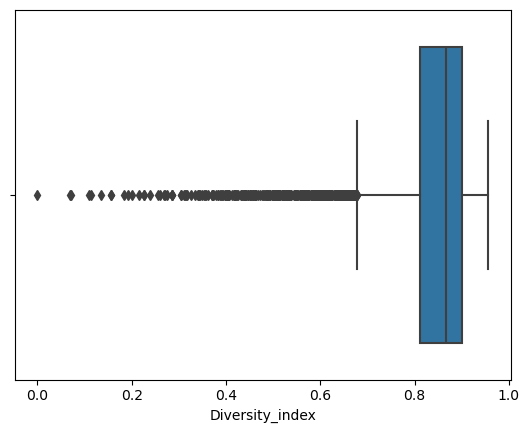

In [20]:

sns.boxplot(x=df1["Diversity_index"])

Extremely High number of Outliers are visibile in the box plot

#### Distribution Plot

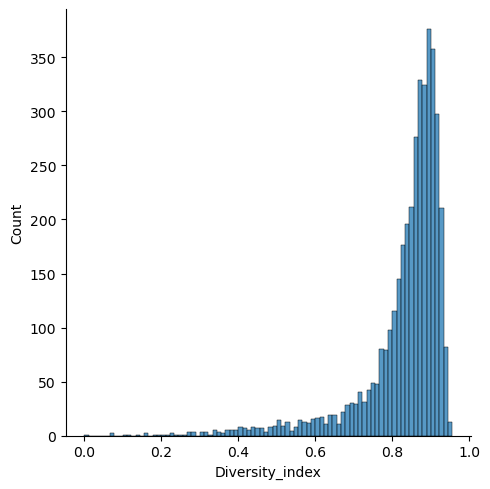

In [21]:
sns.displot(data=df1, x="Diversity_index")

Most of the datapoints are concentrated at 0.87

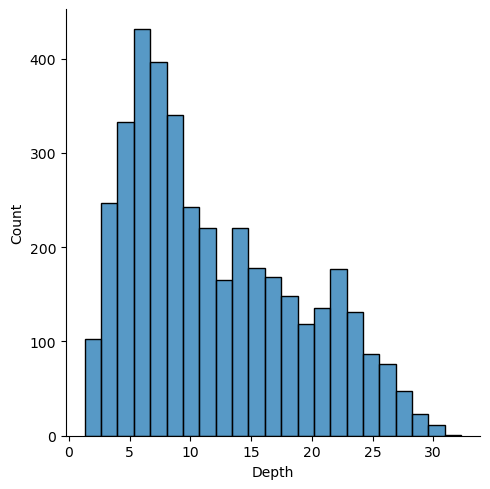

In [22]:
sns.displot(data=df1, x="Depth")

There are fluctuations/ high and lows in the data and maximum is between 5 and 10

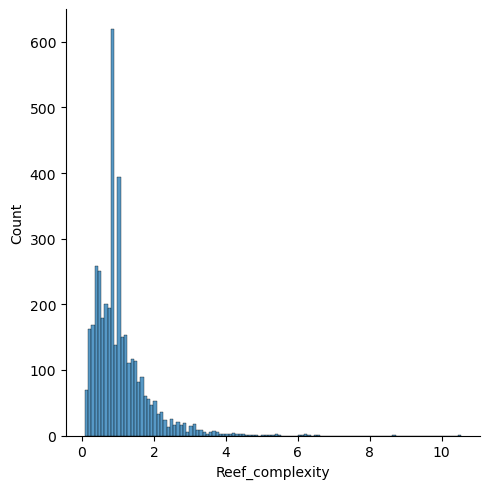

In [23]:
sns.displot(data=df1, x="Reef_complexity")

There are fluctuations/ highs and lows in the data and maximum is between 0 and 2

Most of the data points are concentrated at 0.8 of DI and between 0 and 1 of reef complexity

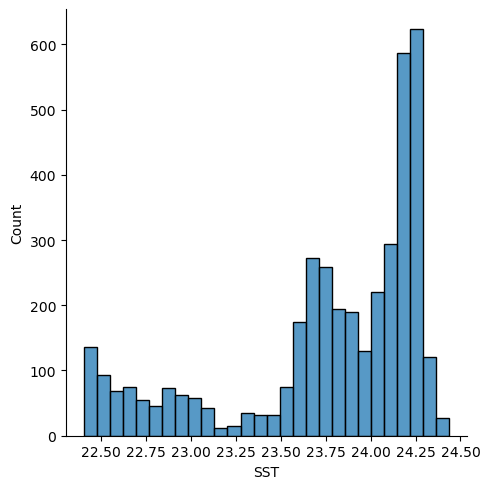

In [24]:
sns.displot(data=df1, x="SST")

There are fluctuations/ highs and lows in the data and max value at 24.25

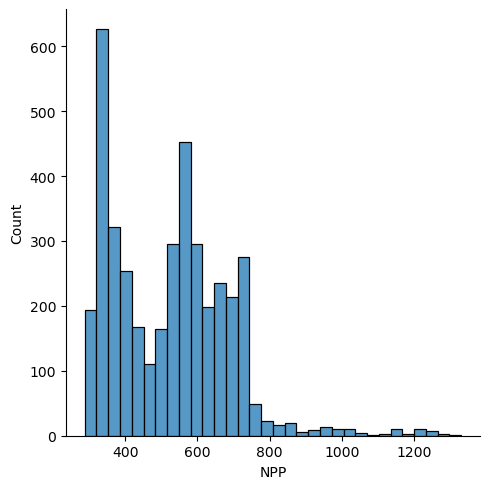

In [25]:
sns.displot(data=df1, x="NPP")

There are fluctuations/ high and lows in the data and maximum is between 0 and 400

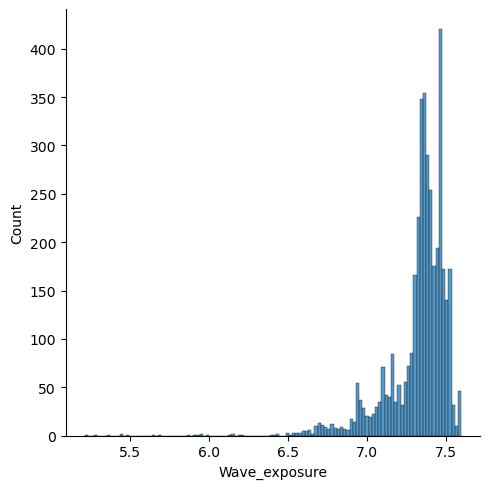

In [26]:
sns.displot(data=df1, x="Wave_exposure")

There are fluctuations/ high and lows in the data and most of the datapoints are concentrated between 7 and 7.5

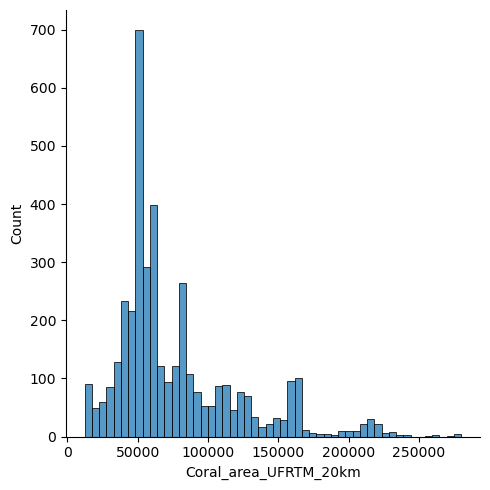

In [27]:
sns.displot(data=df1, x="Coral_area_UFRTM_20km")

There are fluctuations/ high and lows in the data and maximum at 50000

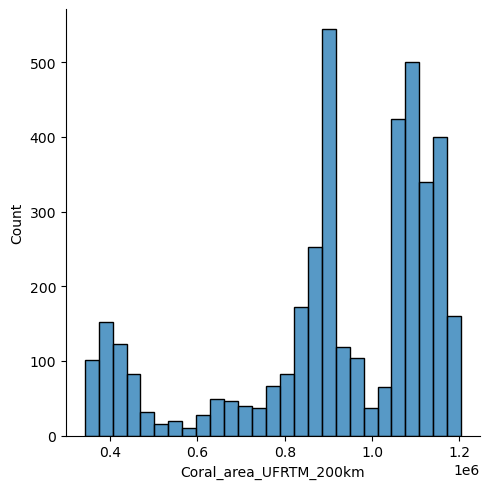

In [28]:
sns.displot(data=df1, x="Coral_area_UFRTM_200km")

There are fluctuations/ high and lows in the data and maximum is between 0.8 and 1

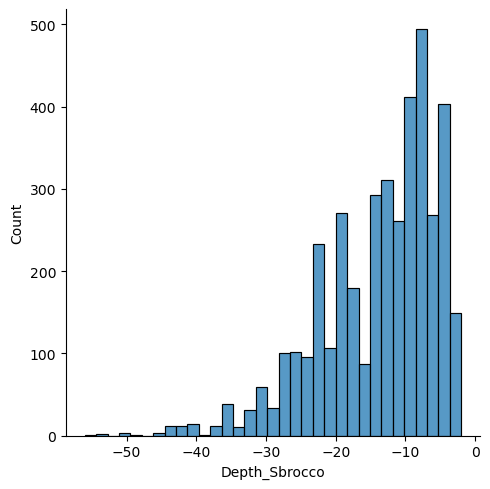

In [29]:
sns.displot(data=df1, x="Depth_Sbrocco")

There are fluctuations/ high and lows in the data and maximum is between -10 and 0

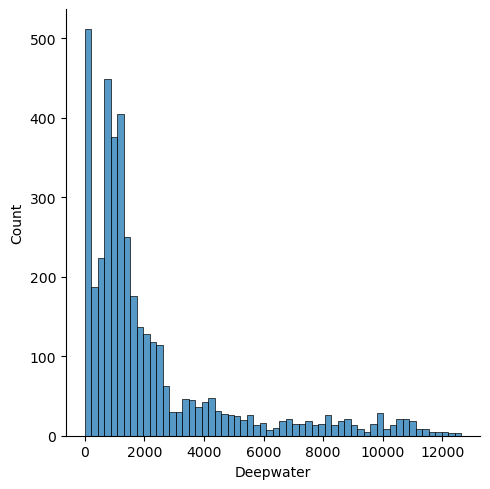

In [30]:
sns.displot(data=df1, x="Deepwater")

There are fluctuations/ high and lows in the data and datapoints are concentrated between is between 0 and 2000

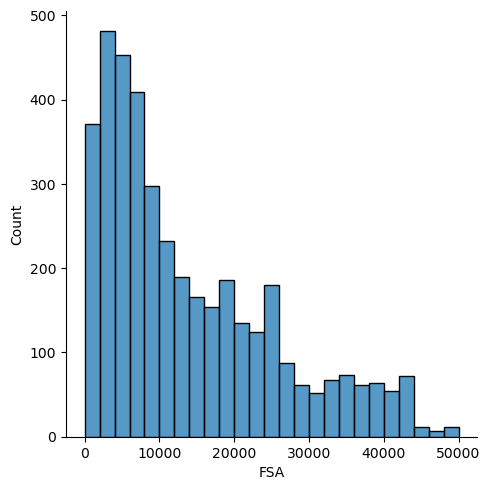

In [31]:
sns.displot(data=df1, x="FSA")

There are fluctuations/ high and lows in the data and datapoints are concentrated between is between 0 and 10000

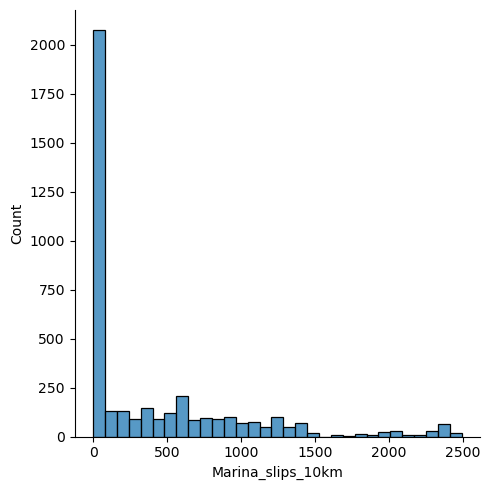

In [32]:
sns.displot(data=df1, x="Marina_slips_10km")

There are fluctuations/ high and lows in the data and datapoints are concentrated at 0

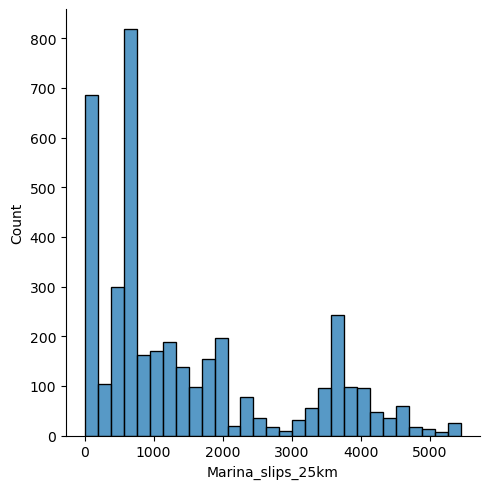

In [33]:
sns.displot(data=df1, x="Marina_slips_25km")

There are fluctuations/ high and lows in the data and maximum  between is  0 and 1000

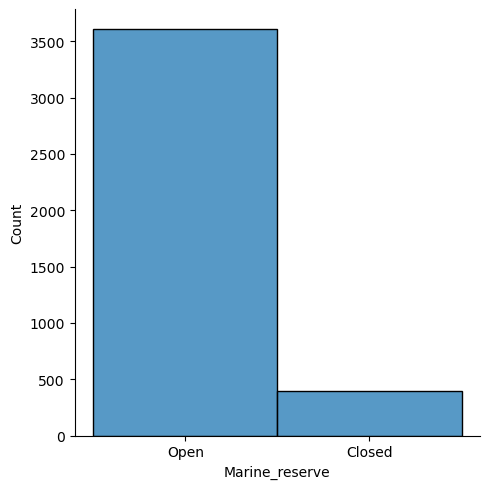

In [34]:
sns.displot(data=df1, x="Marine_reserve")

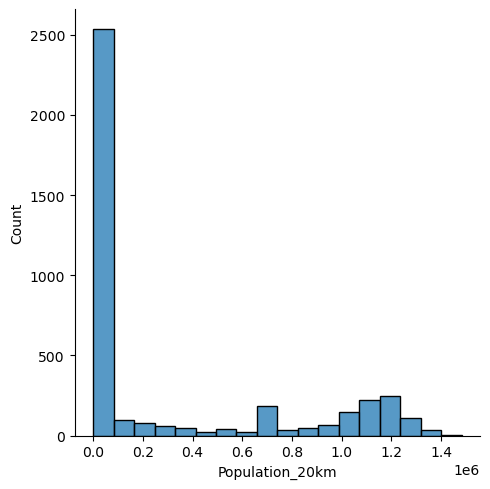

In [35]:
sns.displot(data=df1, x="Population_20km")

There are fluctuations/ high and lows in the data and datapoints are concentrated at 0 

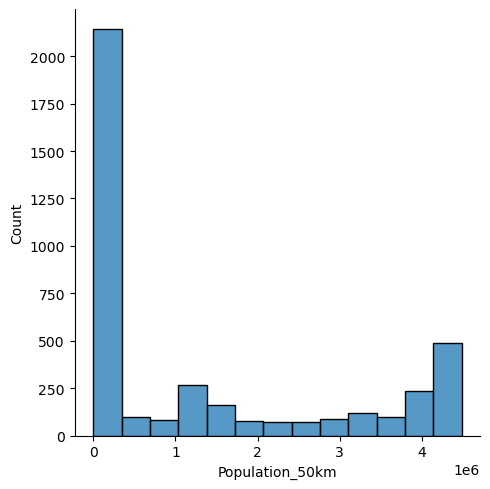

In [36]:
sns.displot(data=df1, x="Population_50km")

There are fluctuations/ high and lows in the data and datapoints are concentrated at 0 

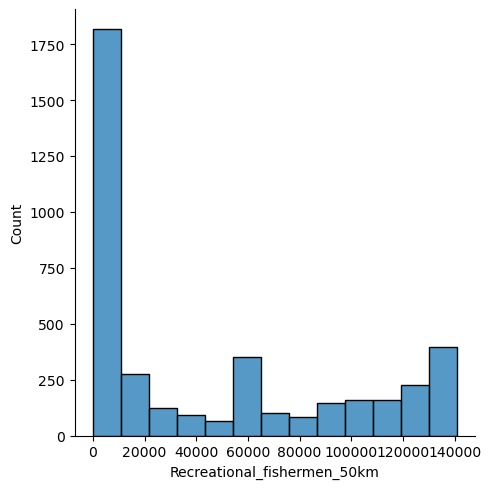

In [37]:
sns.displot(data=df1, x="Recreational_fishermen_50km")

There are fluctuations/ high and lows in the data and datapoints are concentrated at 0 

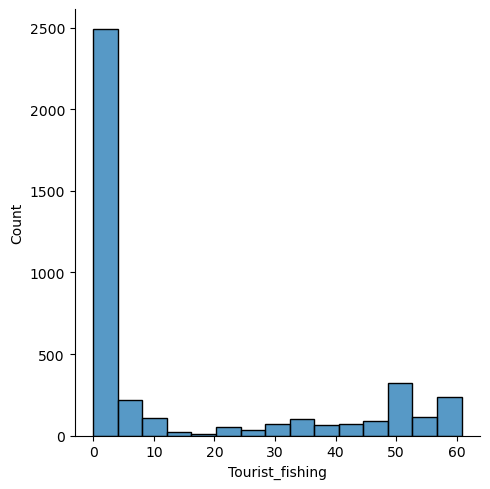

In [38]:
sns.displot(data=df1, x="Tourist_fishing")

There are fluctuations/ high and lows in the data and datapoints are concentrated  at 0 

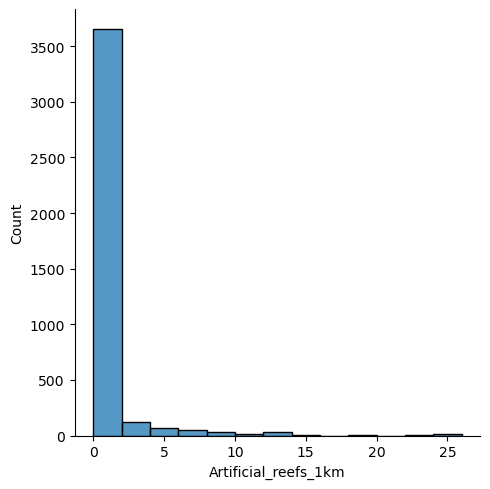

In [39]:
sns.displot(data=df1, x="Artificial_reefs_1km")

There are fluctuations/ high and lows in the data and datapoints are concentrated  at 0 

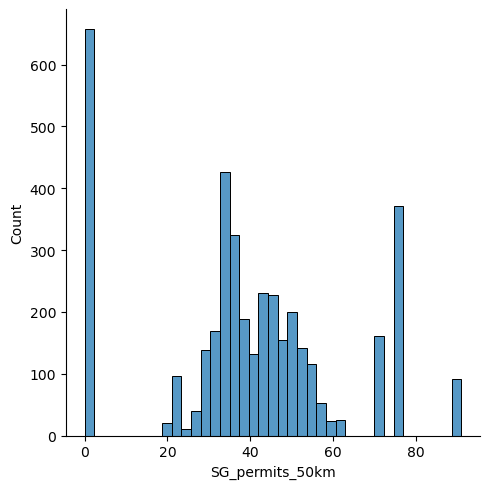

In [40]:
sns.displot(data=df1, x="SG_permits_50km")

There are fluctuations/ high and lows in the data and maximum are at 0 

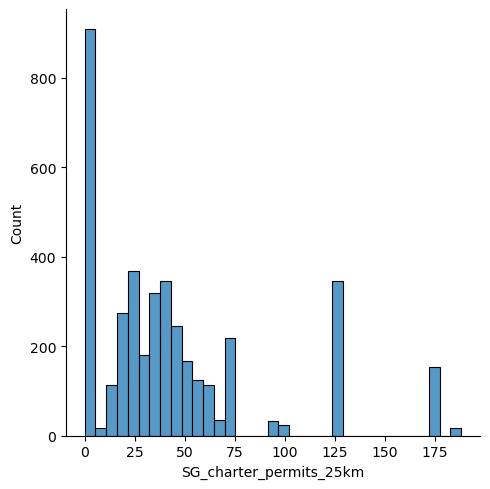

In [41]:
sns.displot(data=df1, x="SG_charter_permits_25km")

There are fluctuations/ high and lows in the data and datapoints are concentrated at 0 

In [42]:
#sns.displot(data=df1, x="Total_gravity_intercept")

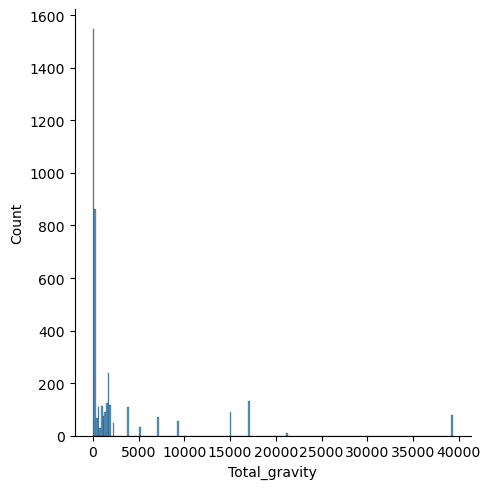

In [43]:
sns.displot(data=df1, x="Total_gravity")

There are fluctuations/ high and lows in the data and datapoints are concentrated at 0 

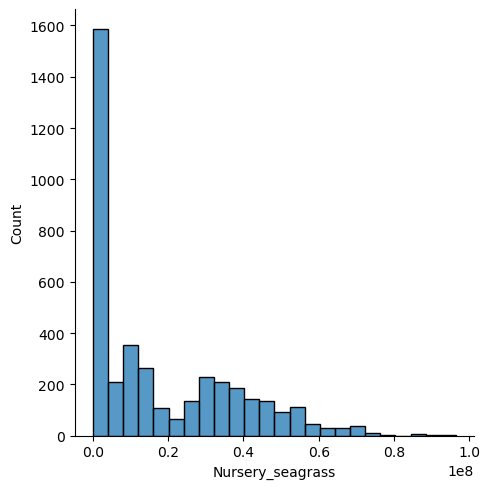

In [44]:
sns.displot(data=df1, x="Nursery_seagrass")

There are fluctuations/ high and lows in the data and datapoints are concentrated at 0 

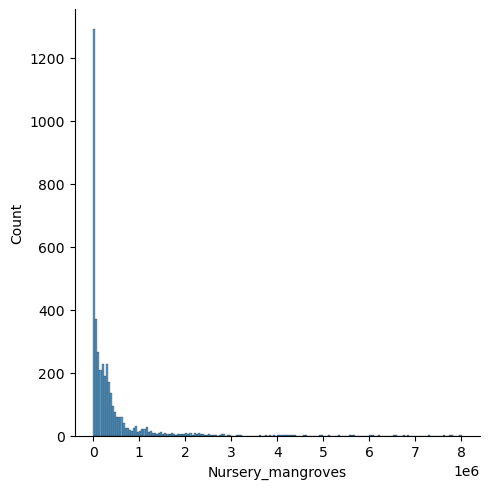

In [45]:
sns.displot(data=df1, x="Nursery_mangroves")

There are fluctuations/ high and lows in the data and datapoints are concentrated at 0 

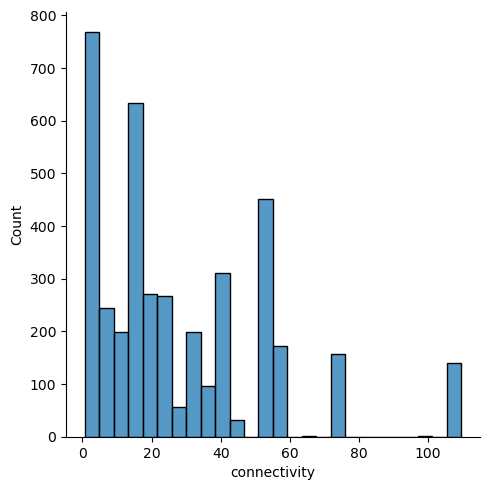

In [46]:
sns.displot(data=df1, x="connectivity")

There are fluctuations/ high and lows in the data and datapoints are concentrated at 0 

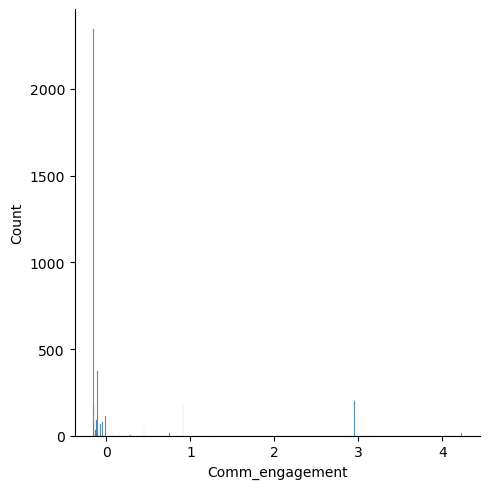

In [47]:
sns.displot(data=df1, x="Comm_engagement")

There are fluctuations/ high and lows in the data and datapoints are concentrated at 0 

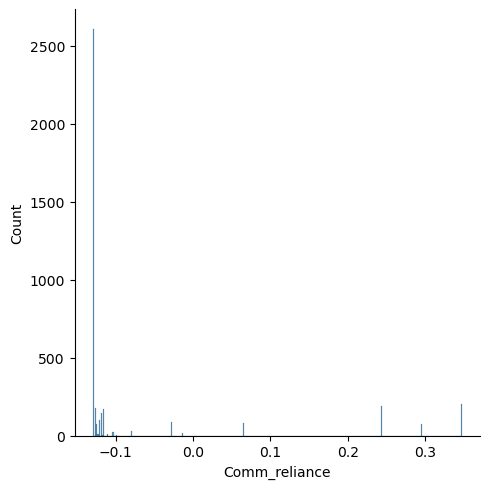

In [48]:
sns.displot(data=df1, x="Comm_reliance")

There are fluctuations/ high and lows in the data and datapoints are concentrated at -0.1 

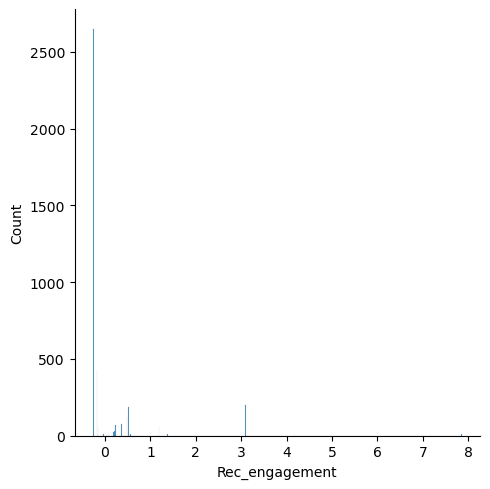

In [49]:
sns.displot(data=df1, x="Rec_engagement")

There are fluctuations/ high and lows in the data and datapoints are concentrated at 0 

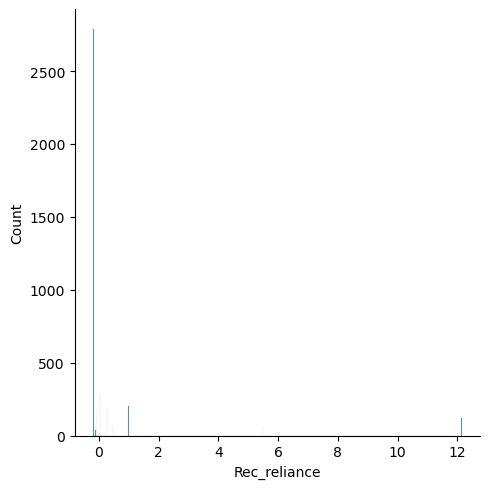

In [50]:
sns.displot(data=df1, x="Rec_reliance")

There are fluctuations/ high and lows in the data and datapoints are concentrated at 0 

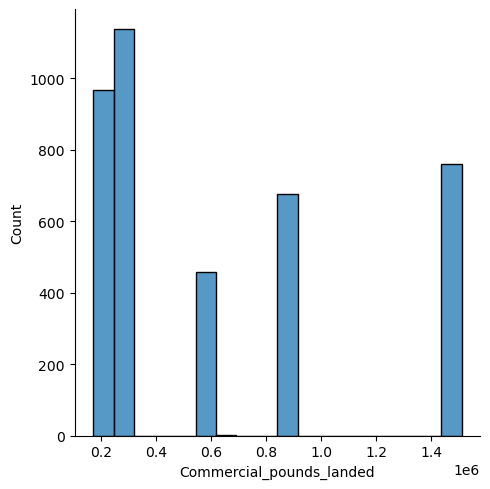

In [51]:
sns.displot(data=df1, x="Commercial_pounds_landed")

There are fluctuations/ high and lows in the data and datapoints are concentrated at 0.2

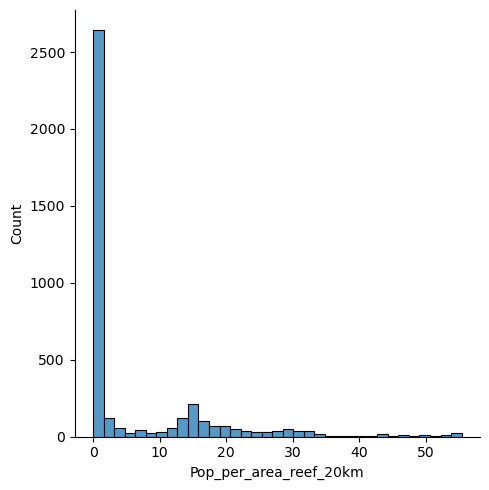

In [52]:
sns.displot(data=df1, x="Pop_per_area_reef_20km")

There are fluctuations/ high and lows in the data and datapoints are concentrated at 0 

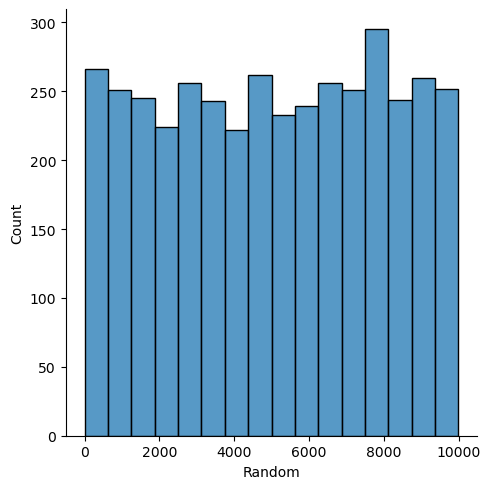

In [53]:
sns.displot(data=df1, x="Random")

There are fluctuations/ high and lows in the data and datapoints are distributed everywhere

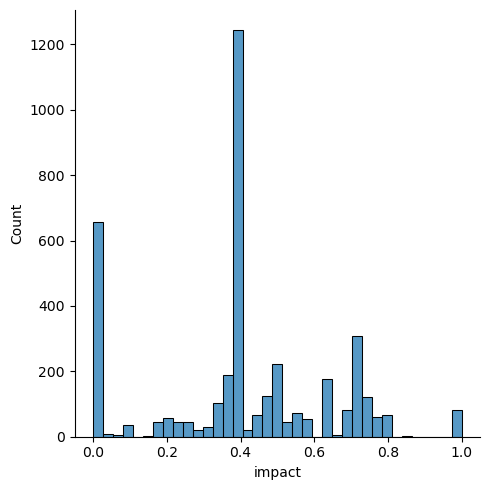

In [54]:
sns.displot(data=df1, x="impact")

There are fluctuations/ high and lows in the data and datapoints are concentrated at 0 

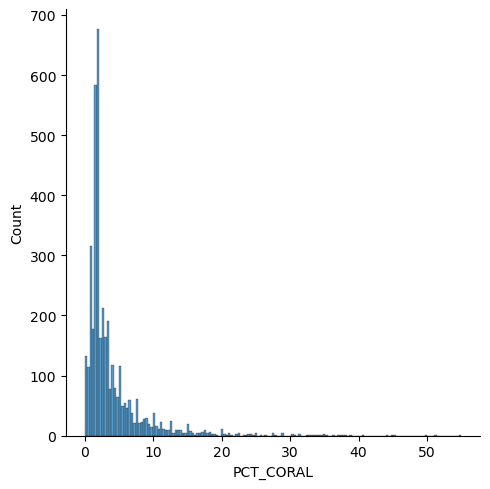

In [55]:
sns.displot(data=df1, x="PCT_CORAL")

In [56]:
There are fluctuations/ high and lows in the data and datapoints are concentrated at 0 

SyntaxError: invalid syntax (3339740012.py, line 1)

In [ ]:
sns.displot(data=df1, x="MAX_HARD_RELIEF")

There are fluctuations/ high and lows in the data and datapoints are concentrated at 0 

In [ ]:
sns.displot(data=df1, x="no.divers")

#### ScatterPlot

In [ ]:
sns.scatterplot(data=df1, x="Reef_complexity", y="Diversity_index")

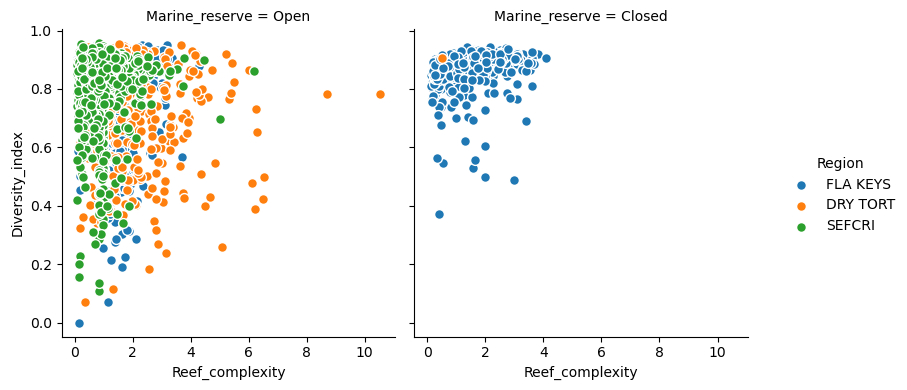

In [57]:
g = sns.FacetGrid(df1, col="Marine_reserve", hue="Region", margin_titles=True, height=4)
g.map(plt.scatter, "Reef_complexity", "Diversity_index", edgecolor="white", s=50, lw=1)
g.add_legend()

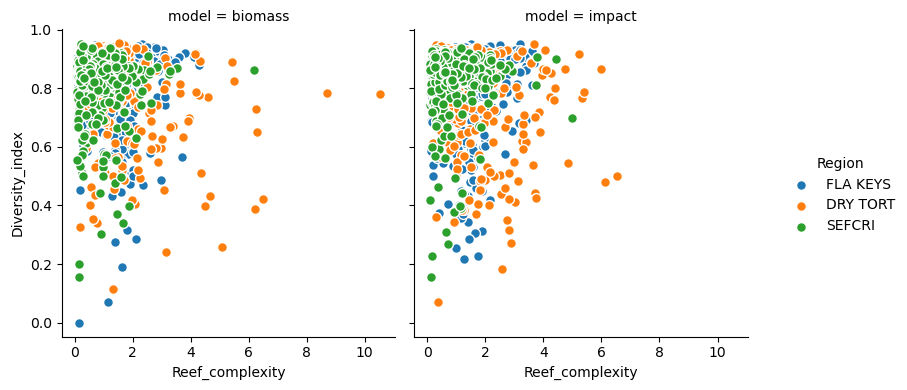

In [221]:
g = sns.FacetGrid(df1, col="model", hue="Region", margin_titles=True, height=4)
g.map(plt.scatter, "Reef_complexity", "Diversity_index", edgecolor="white", s=50, lw=1)
g.add_legend()

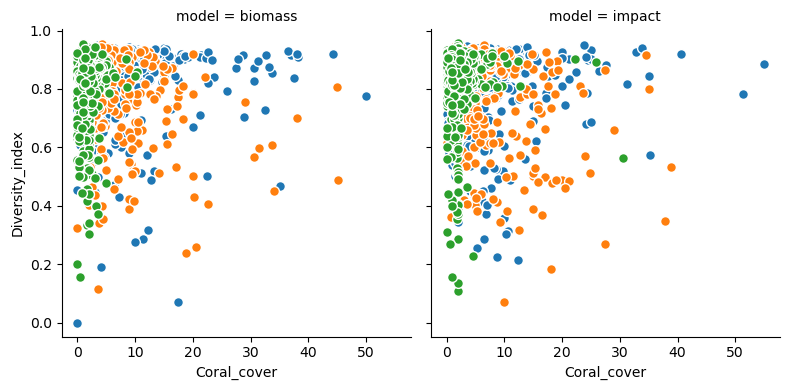

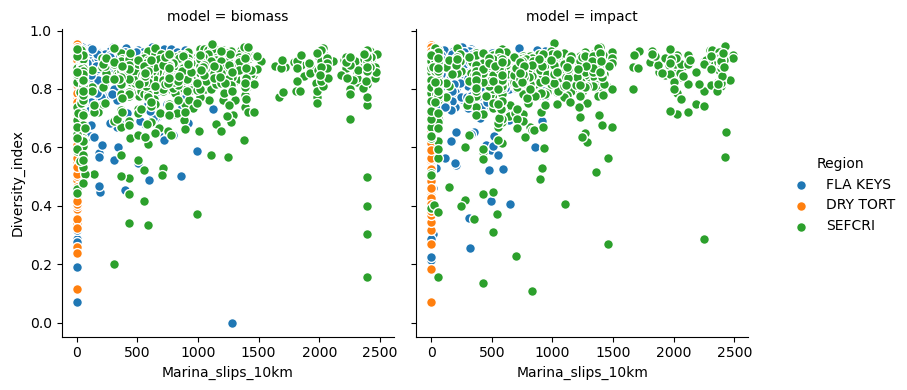

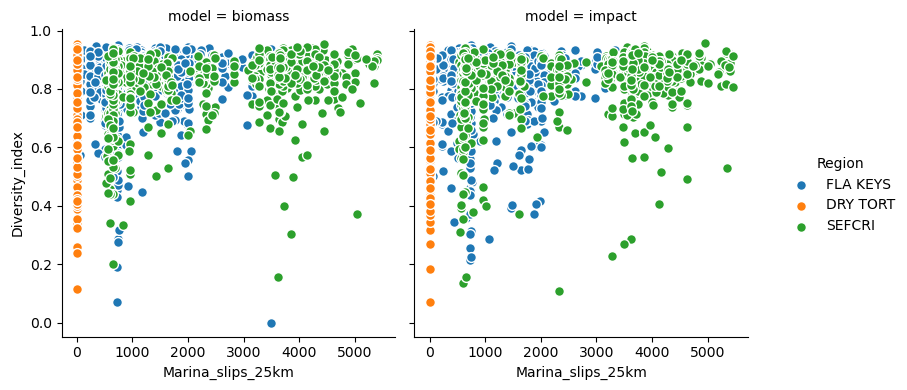

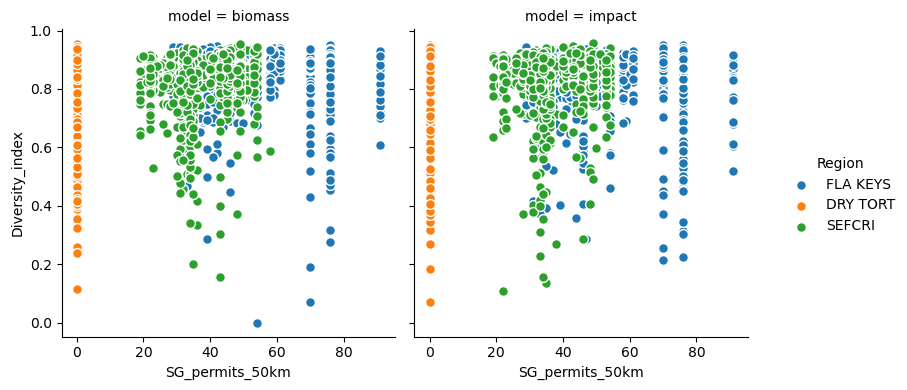

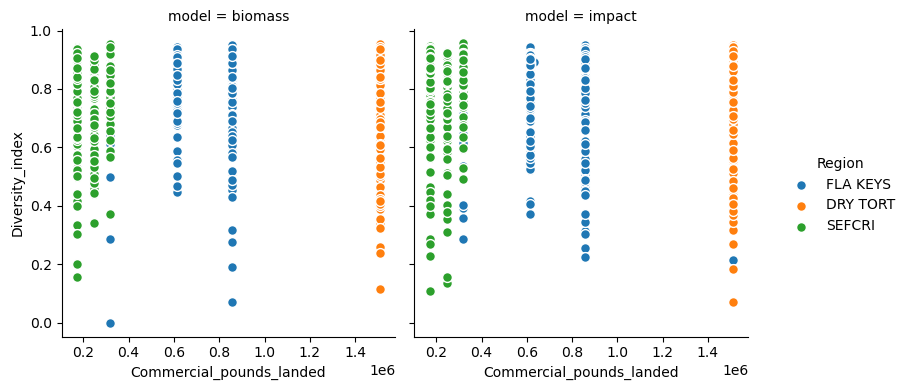

In [61]:
g = sns.FacetGrid(df1, col="model", hue="Region", margin_titles=True, height=4)
g.map(plt.scatter, "Coral_cover", "Diversity_index", edgecolor="white", s=50, lw=1)
h = sns.FacetGrid(df1, col="model", hue="Region", margin_titles=True, height=4)
h.map(plt.scatter, "Marina_slips_10km", "Diversity_index", edgecolor="white", s=50, lw=1)
h.add_legend()
a = sns.FacetGrid(df1, col="model", hue="Region", margin_titles=True, height=4)
a.map(plt.scatter, "Marina_slips_25km", "Diversity_index", edgecolor="white", s=50, lw=1)
a.add_legend()
b = sns.FacetGrid(df1, col="model", hue="Region", margin_titles=True, height=4)
b.map(plt.scatter, "SG_permits_50km", "Diversity_index", edgecolor="white", s=50, lw=1)
b.add_legend()
c = sns.FacetGrid(df1, col="model", hue="Region", margin_titles=True, height=4)
c.map(plt.scatter, "Commercial_pounds_landed", "Diversity_index", edgecolor="white", s=50, lw=1)
c.add_legend()

<Axes: xlabel='SST', ylabel='Diversity_index'>

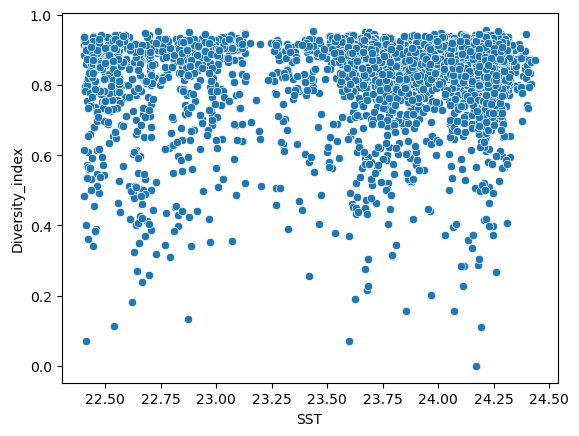

In [217]:
sns.scatterplot(data=df1, x="SST", y="Diversity_index")

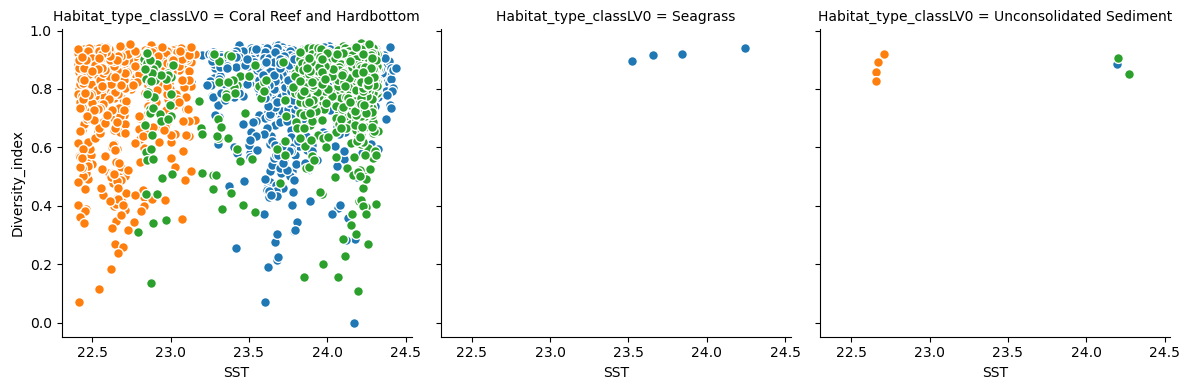

In [216]:
g = sns.FacetGrid(df1, col="Habitat_type_classLV0", hue="Region", margin_titles=True, height=4)
g.map(plt.scatter, "SST", "Diversity_index", edgecolor="white", s=50, lw=1)

<Axes: xlabel='NPP', ylabel='Diversity_index'>

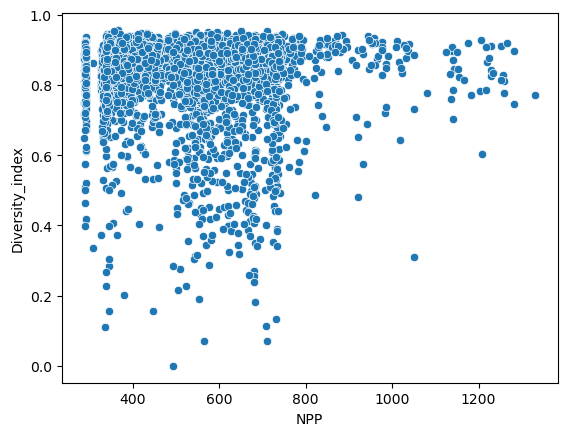

In [196]:
sns.scatterplot(data=df1, x="NPP", y="Diversity_index")

<Axes: xlabel='Coral_area_UFRTM_200km', ylabel='Diversity_index'>

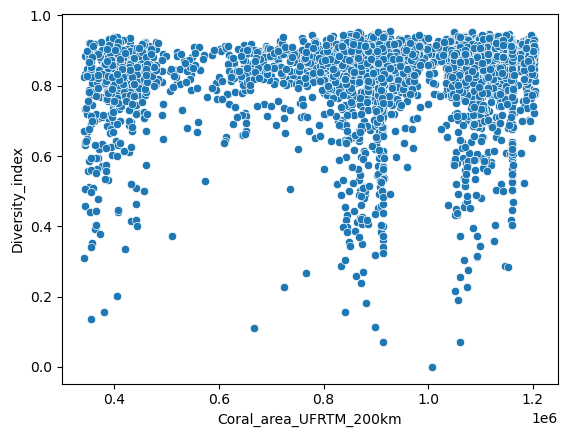

In [197]:
sns.scatterplot(data=df1, x="Coral_area_UFRTM_200km", y="Diversity_index")

<Axes: xlabel='Depth_Sbrocco', ylabel='Diversity_index'>

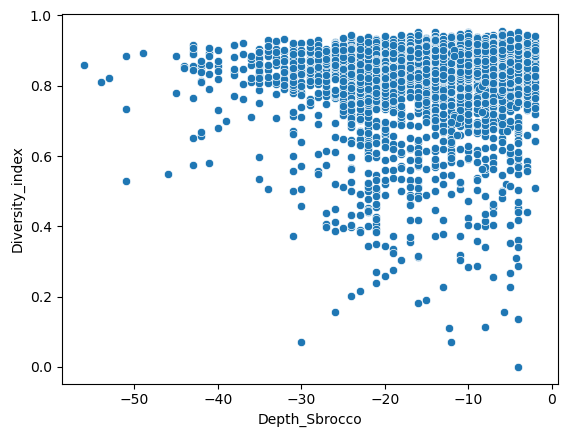

In [198]:
sns.scatterplot(data=df1, x="Depth_Sbrocco", y="Diversity_index")

<Axes: xlabel='FSA', ylabel='Diversity_index'>

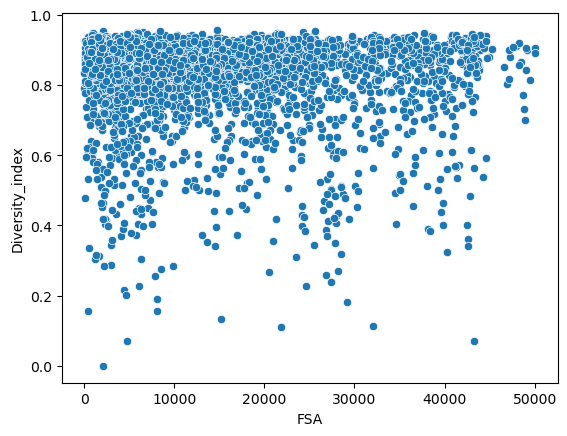

In [199]:
sns.scatterplot(data=df1, x="FSA", y="Diversity_index")

<Axes: xlabel='Marina_slips_25km', ylabel='Diversity_index'>

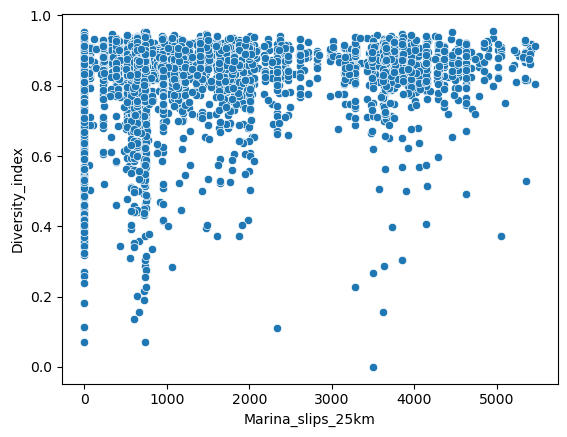

In [200]:
sns.scatterplot(data=df1, x="Marina_slips_25km", y="Diversity_index")

<Axes: xlabel='Population_20km', ylabel='Diversity_index'>

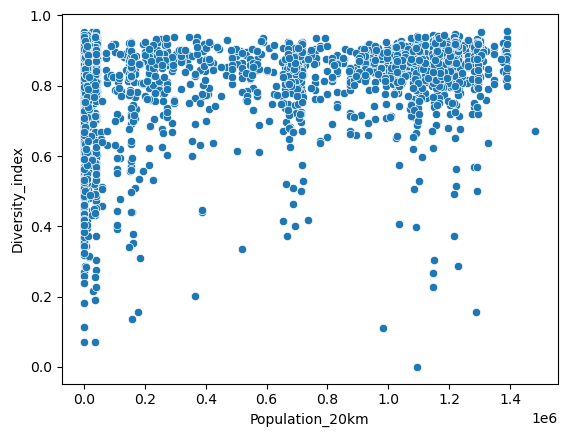

In [201]:
sns.scatterplot(data=df1, x="Population_20km", y="Diversity_index")

<Axes: xlabel='Recreational_fishermen_50km', ylabel='Diversity_index'>

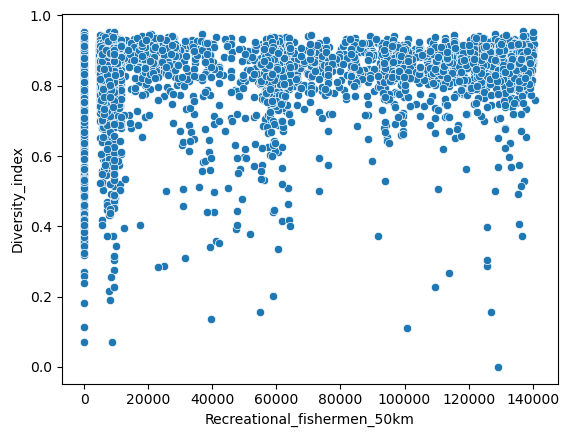

In [202]:
sns.scatterplot(data=df1, x="Recreational_fishermen_50km", y="Diversity_index")

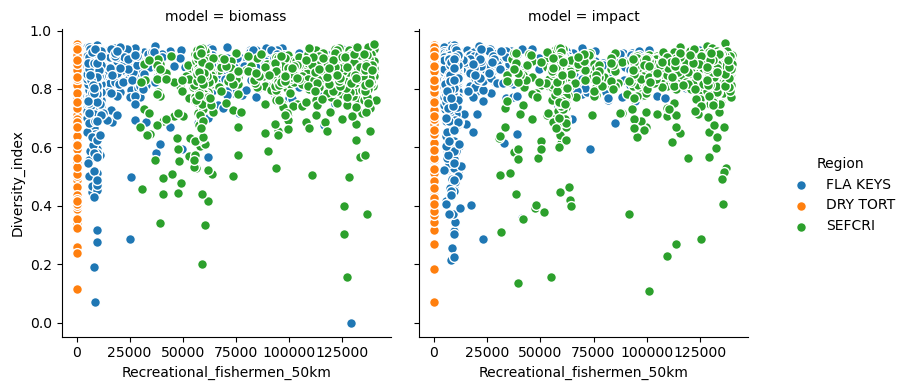

In [226]:
g = sns.FacetGrid(df1, col="model", hue="Region", margin_titles=True, height=4)
g.map(plt.scatter, "Recreational_fishermen_50km", "Diversity_index", edgecolor="white", s=50, lw=1)
g.add_legend()

Most of the dry tort have recreational_fishermen_50km values zero

<Axes: xlabel='Tourist_fishing', ylabel='Diversity_index'>

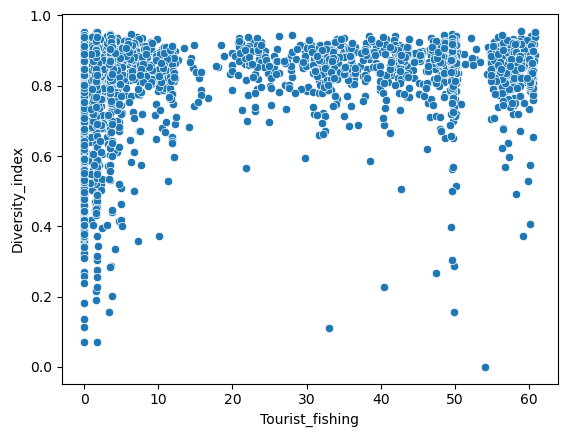

In [203]:
sns.scatterplot(data=df1, x="Tourist_fishing", y="Diversity_index")

<Axes: xlabel='SG_permits_50km', ylabel='Diversity_index'>

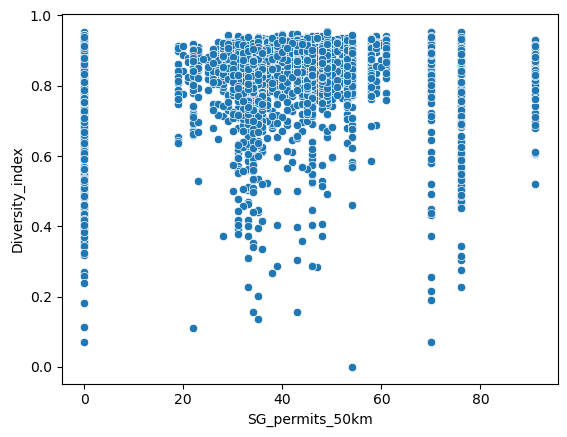

In [204]:
sns.scatterplot(data=df1, x="SG_permits_50km", y="Diversity_index")

<Axes: xlabel='SG_charter_permits_25km', ylabel='Diversity_index'>

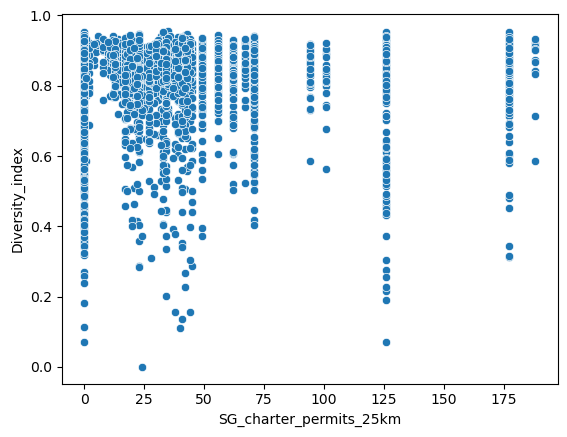

In [205]:
sns.scatterplot(data=df1, x="SG_charter_permits_25km", y="Diversity_index")

<Axes: xlabel='Nursery_seagrass', ylabel='Diversity_index'>

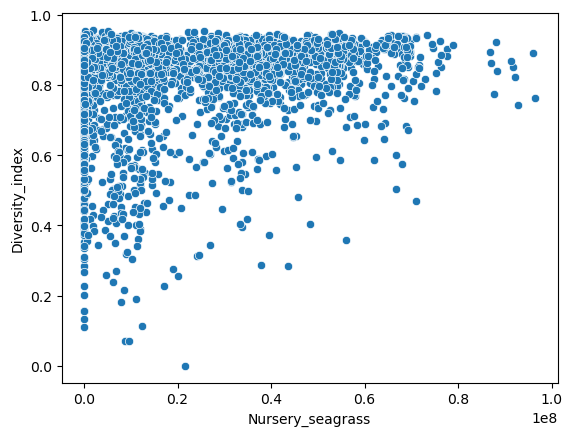

In [206]:
sns.scatterplot(data=df1, x="Nursery_seagrass", y="Diversity_index")


<Axes: xlabel='connectivity', ylabel='Diversity_index'>

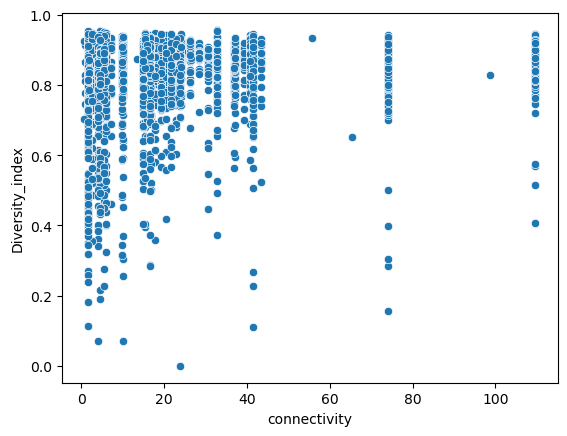

In [207]:
sns.scatterplot(data=df1, x="connectivity", y="Diversity_index")

<Axes: xlabel='Commercial_pounds_landed', ylabel='Diversity_index'>

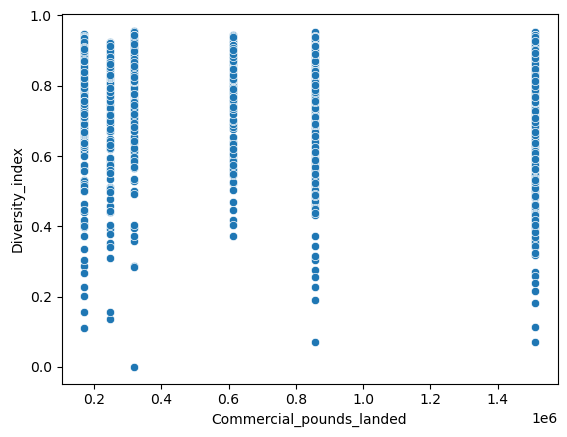

In [208]:
sns.scatterplot(data=df1, x="Commercial_pounds_landed", y="Diversity_index")

<Axes: xlabel='Pop_per_area_reef_20km', ylabel='Diversity_index'>

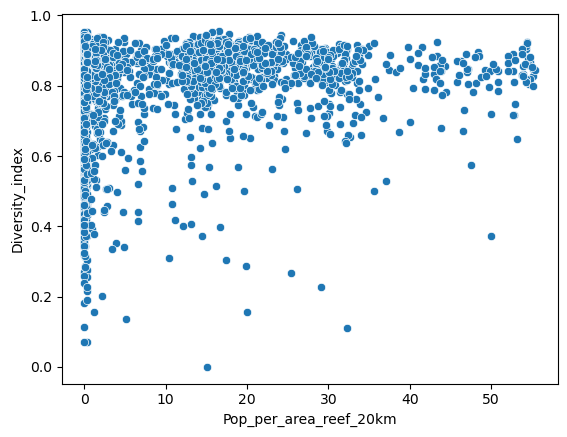

In [209]:
sns.scatterplot(data=df1, x="Pop_per_area_reef_20km", y="Diversity_index")

#### Swarm Plot

<Figure size 7000x4000 with 0 Axes>

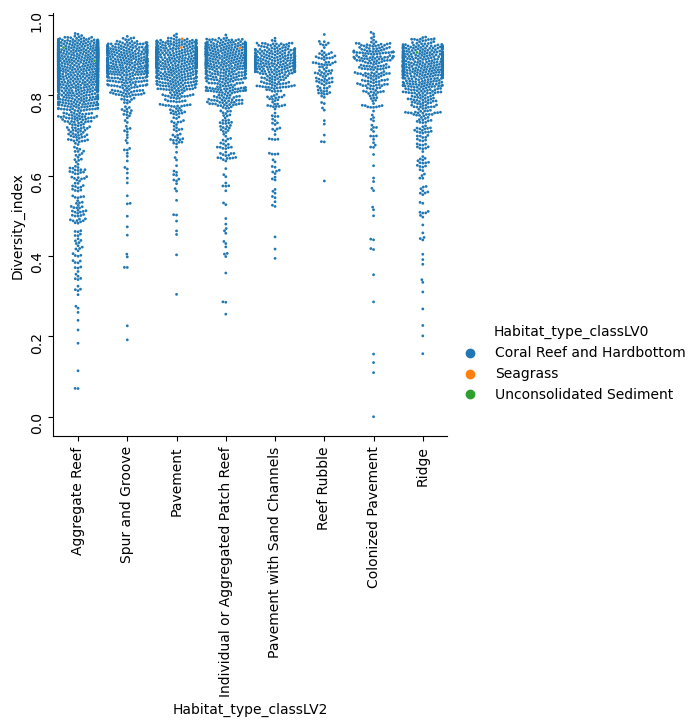

In [210]:
plt.figure(figsize=(70, 40))
sns.catplot(data=df1, x="Habitat_type_classLV2", y="Diversity_index", hue="Habitat_type_classLV0", kind="swarm", size=2)
plt.tick_params(labelrotation=90)

<Figure size 7000x4000 with 0 Axes>

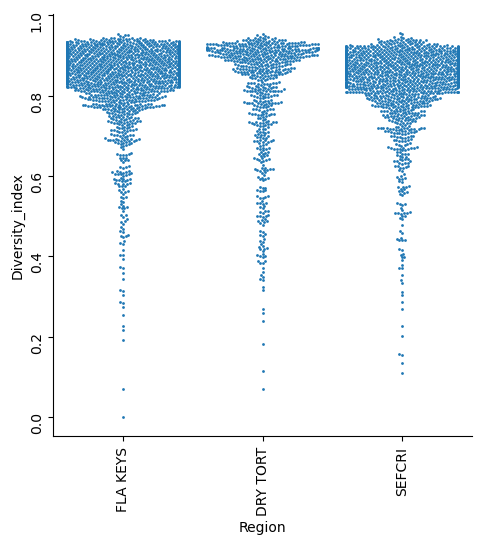

In [211]:
plt.figure(figsize=(70, 40))
sns.catplot(data=df1, x="Region", y="Diversity_index", kind="swarm", size=2)
plt.tick_params(labelrotation=90)

-- END OF VIZ

In [239]:
df1 = df1.drop(columns=['site','HABITAT_CD'])
df1 = df1.drop(df1.columns[-5], axis=1)

In [240]:
#df = df["DryTortugas"].fillna(0)
#df = df["DryTortugas"].str.replace('DRTO','DRTO')
#plt.title("Diversity_index vs DryTortugas")
#No relation between Diversity_index vs DryTortugas hence can be dropped

In [241]:
# get_dummies tranforms categorical data to numbers
# here we want to transform the "Sex" column from ['male', 'female'] to [0,1]

region_dummies = pd.get_dummies(df1.Region, drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df1 = pd.concat([df1, region_dummies], axis=1)

# Drop the original 'Region' column if desired
df1.drop(columns=["Region"], inplace=True)

model_dummies = pd.get_dummies(df1.model, drop_first=True)
df1 = pd.concat([df1, model_dummies], axis=1)
df1.drop(columns=["model"], inplace=True)

Month_dummies = pd.get_dummies(df1.Month, drop_first=True)
df1 = pd.concat([df1, Month_dummies], axis=1)
df1.drop(columns=["Month"], inplace=True)

Habitat_type_classLV0_dummies = pd.get_dummies(df1.Habitat_type_classLV0, drop_first=True)
df1 = pd.concat([df1, Habitat_type_classLV0_dummies], axis=1)
df1.drop(columns=["Habitat_type_classLV0"], inplace=True)

Habitat_type_classLV2_dummies = pd.get_dummies(df1.Habitat_type_classLV2, drop_first=True)
df1 = pd.concat([df1, Habitat_type_classLV2_dummies], axis=1)
df1.drop(columns=["Habitat_type_classLV2"], inplace=True)

Marine_reserve_dummies = pd.get_dummies(df1.Marine_reserve, drop_first=True)
df1 = pd.concat([df1, Marine_reserve_dummies], axis=1)
df1.drop(columns=["Marine_reserve"], inplace=True)

In [242]:
len(df1)

3999

### Correlation Matrix

In [243]:
df2=df1.corr()

In [244]:
df2.Diversity_index

Year                                   0.039844
Latitude                              -0.049113
Longitude                              0.087126
Depth                                 -0.207735
Coral_cover                           -0.132432
Reef_complexity                       -0.137309
SST                                    0.151907
NPP                                   -0.048109
Wave_exposure                         -0.067864
Coral_area_UFRTM_20km                  0.044208
Coral_area_UFRTM_200km                 0.150167
Depth_Sbrocco                          0.121668
Deepwater                             -0.037910
FSA                                   -0.059314
Marina_slips_10km                      0.058860
Marina_slips_25km                      0.106543
Population_20km                        0.045993
Population_50km                        0.066104
Recreational_fishermen_50km            0.070398
Tourist_fishing                        0.095875
Artificial_reefs_1km                   0

#### Correlation heatmap

<Axes: >

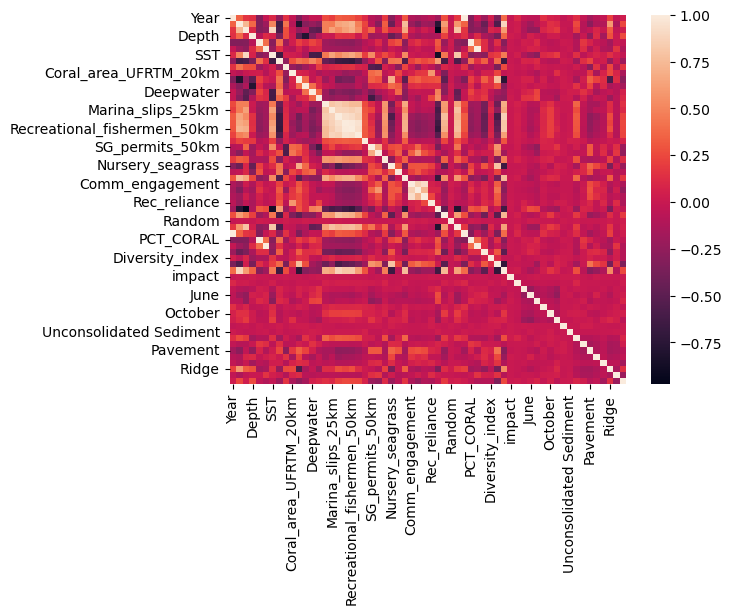

In [245]:
sns.heatmap(df1.corr())

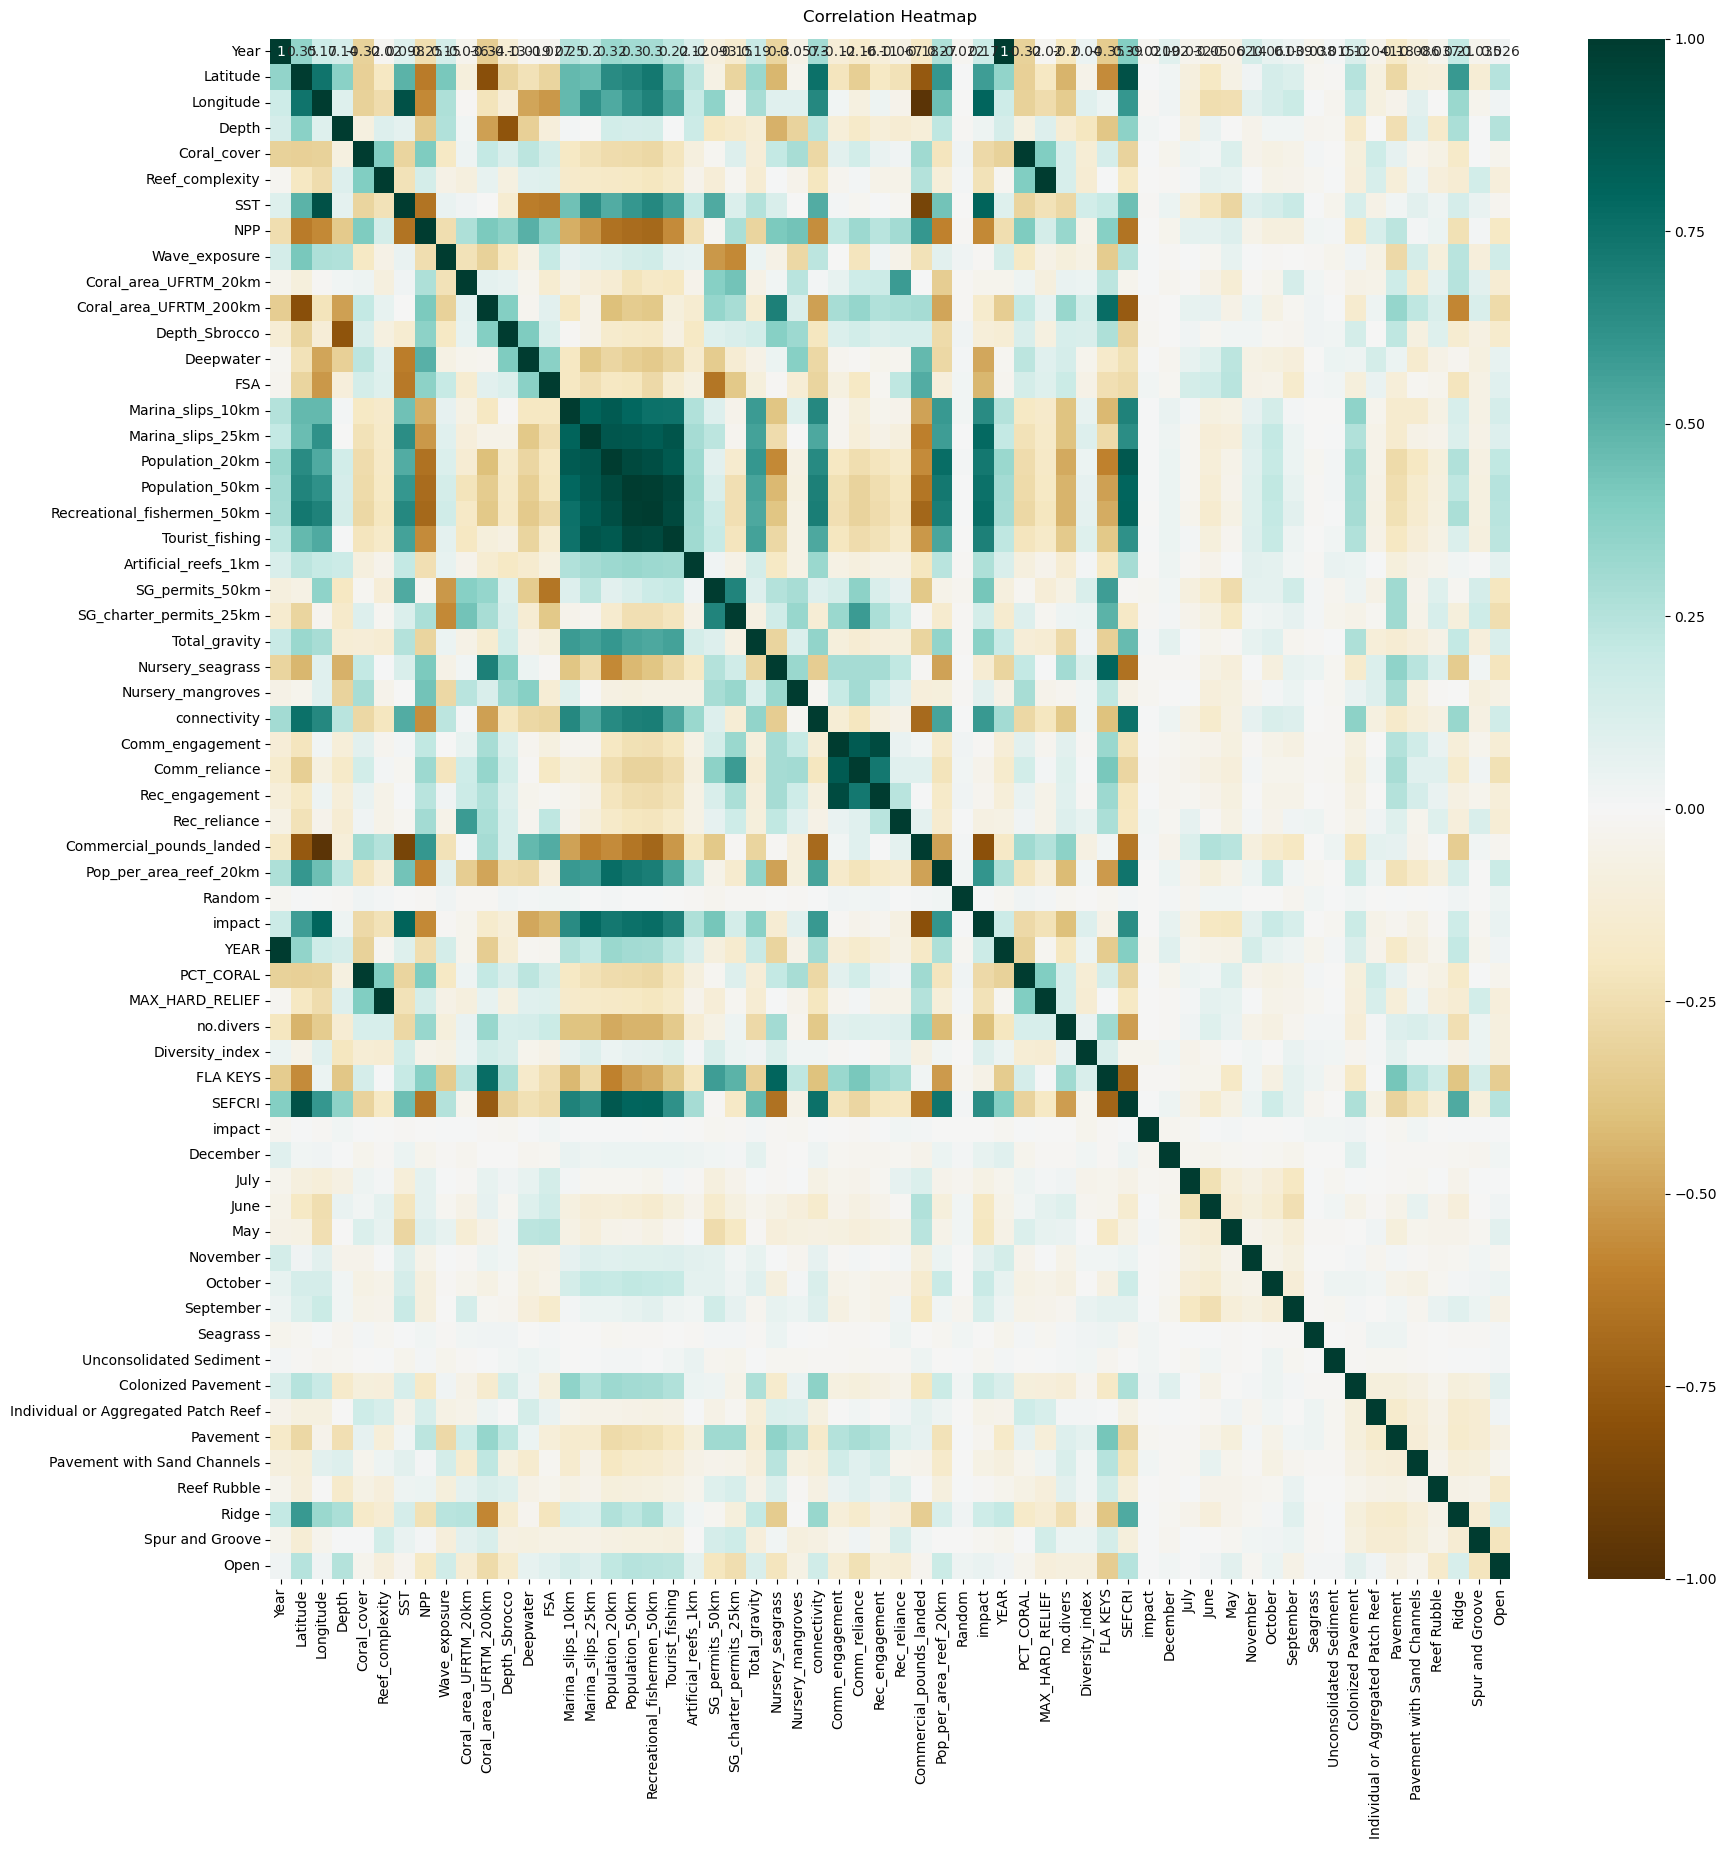

In [246]:
plt.figure(figsize=(20, 20))
#Store heatmap object in a variable to easily access it when you want to include more features (such as title).
#Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

#Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12); plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

Features are weakly correlated with the target Diversity Index

Direct relation	                    Invert relation
Comm_reliance                      	Depth                              
May                                	Reef_complexity                    
Individual or Aggregated Patch Reef	MAX_HARD_RELIEF                    
Artificial_reefs_1km               	Coral_cover                        
Pavement with Sand Channels        	PCT_CORAL                          
Pop_per_area_reef_20km                           
Unconsolidated Sediment            	Commercial_pounds_landed           
November                           	Wave_exposure                      
connectivity                       	FSA                                
December                           	Ridge                              
Reef Rubble                                 
Nursery_mangroves                  	NPP                       
Seagrass               	July                               
Total_gravity                      	Deepwater                          
SG_charter_permits_25km            	impact                         
Year                         	SEFCRI                             
YEAR                                
Spur and Groove   SEFCRI                  
Coral_area_UFRTM_Comm_engagement                    
Population_20km                    	Rec_engagement                     
September                          	Random                             
no.divers                   	October                            
Rec_reliance                       	
Marina_slips_10km                  	
Population_50km                    	
Recreational_fishermen_50km        	
Pavement                           	
Longitude                          	
Tourist_fishing                    	
Marina_slips_25km                  	
impact                             	
Nursery_seagrass                   	
FLA KEYS                           	
SG_permits_50km                    	
Depth_Sbrocco                      	
Coral_area_UFRTM_200km             	
SST                                	
Diversity_index                    	


Hence, Features with very weak correlation can be dropped for further analysis

In [24]:
#df1.drop(columns=["Depth","Reef_complexity","MAX_HARD_RELIEF","Coral_cover","PCT_CORAL","Open","Commercial_pounds_landed","Wave_exposure","FSA","Ridge","Latitude","NPP","July","Deepwater","impact","SEFCRI","Colonized Pavement","June","Comm_engagement", "Rec_engagement", "Random","October","Comm_reliance","May","Individual or Aggregated Patch Reef","Artificial_reefs_1km","Pavement with Sand Channels","Pop_per_area_reef_20km","Unconsolidated Sediment","November","connectivity","December"], inplace=True)

Outliers can be removed as it can cause the weak relation

Rows with Seagrass should not be dropped as it may cause more
0imbalance in the data